# Laboratory 9- Muscle Physiology

# Purpose
Myology, the study of muscles, investigates the performance of skeletal, cardiac, and smooth muscle. although all muscle cells are similar in their abilities to depolarize and contract, they differ in their degree of innervation, rate and duration of contraction, fatigue rate and response to neurotransmitters

# Procedures
9-D
1. get iWorx started on laptop computers with connecting of EMG machine
2. open Labscribe3 program
3. remove all jewelry off of subjects arms and wrist. use an alcohol swab to clean the regions of skin on the forearm you are going to use. let area dry. remove a disposable electrode from its plastic shield and apply the electrode to the six locations
4. place the electrodes from proximal to distal on the forearm in the order listed on pg 61 of lab manual
5. record an EMG of the muscles of the foremarm illustrating agonistic and antagonistic muscle activity for each of the exercises described below. click the red "REC" button to begin recording then press the ENTER key on the keyboard to mark the beginning of each activity


# Results

#### importing libraries
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
df = pd.read_csv (r'./matt 2.txt', sep = '\t') 
df

,Time,EMG,Muscle Force
0,0.000,0.000000,0.221656
1,0.001,0.000000,0.221656
2,0.002,0.000000,0.221283
3,0.003,0.000000,0.221283
4,0.004,0.000000,0.221283
...,...,...,...
61019,61.019,-0.021938,0.221656
61020,61.020,-0.081695,0.221656
61021,61.021,-0.046602,0.221656
61022,61.022,0.030905,0.221656


Text(0, 0.5, 'EMG (Volts)')

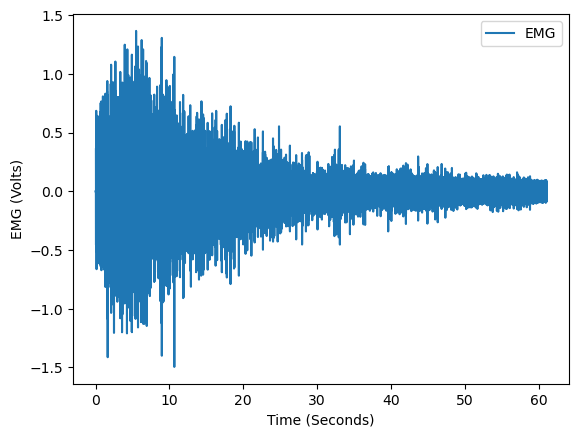

In [40]:
fig, ax = plt.subplots()
df.plot.line(ax = ax, y = 'EMG', x = 'Time')
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("EMG (Volts)")

In [41]:
# Define the parameters 
window_size = 3  # Window size in seconds (how large of a window you want to take the avg max of)
step_size = 10  # Step size in seconds (how often you want to check the window size)

In [42]:
# Initialize lists to store the calculated max values
max_values = []
time_intervals = []

# Iterate through the data in steps
for i in range(0, len(df), int(step_size / 0.001)):
    start_idx = i
    end_idx = start_idx + int(window_size / 0.001)
    
    if end_idx < len(df):
        window_data = df.iloc[start_idx:end_idx]
        max_value = window_data['EMG'].max()
        max_values.append(max_value)
        
        # Calculate the time interval (take the midpoint of the window)
        time_interval = window_data['Time'].mean()
        time_intervals.append(time_interval)

# Create a new DataFrame with the calculated max values and time intervals
result_df = pd.DataFrame({'Time': time_intervals, 'MaxEMG': max_values})

# Calculate the percentage of max EMG for each 0.5 seconds interval
result_df['MaxEMG_percent'] = (result_df['MaxEMG'] / result_df['MaxEMG'].max()) * 100

# Display the result
print(result_df)

      Time    MaxEMG  MaxEMG_percent
0   1.4995  1.105490       96.509730
1  11.4995  1.145470      100.000000
2  21.4995  0.529550       46.229932
3  31.4995  0.356815       31.150096
4  41.4995  0.240445       20.990947
5  51.4995  0.158654       13.850559


In [43]:
threshold = 70 

reached_threshold = result_df[result_df['MaxEMG_percent'] <= threshold]
time_at_threshold = reached_threshold['Time'].iloc[0]
print(f"Time at ~{threshold} % of max: {time_at_threshold} seconds")

Time at ~70 % of max: 21.4995 seconds


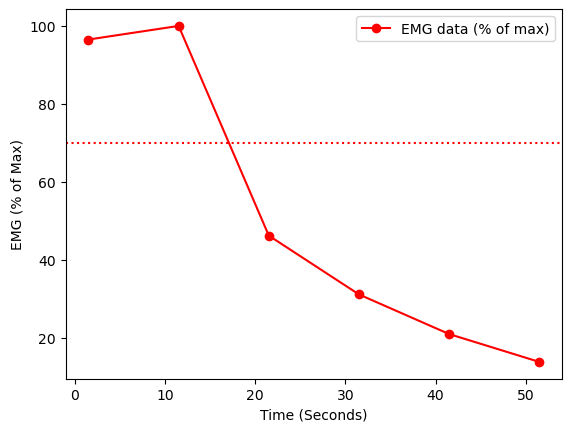

In [44]:
fig, ax = plt.subplots()
result_df.plot.line(ax = ax, y = 'MaxEMG_percent', x = 'Time', color = 'r', marker = 'o')
L=plt.legend()
L.get_texts()[0].set_text('EMG data (% of max)')
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("EMG (% of Max)")
plt.axhline(threshold, color='red', ls='dotted')

# Discussion
At zero seconds the maximum strength is at 96% after 51 seconds fatigue is recorded at 13%

# Conclusion
at the beginning of recording, strength is strong and after the period of tensing hold the ball- fatigue is apparent